<a href="https://colab.research.google.com/github/DivyaRIyer/DataScienceProjects/blob/main/Bank_Churn_Deep_Learning_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction***

######*Date - 17/04/2021*
######*Author - Divya Iyer*
Churn Modelling dataset is about some customers who are withdrawing their account from the bank due to some loss and other issues. It is crutial for banks to understand nature of their customer to come up with significant strategies to retain them. With the help of existing data we will try to analyse customer behaviour which drives them to exit from the bank. 

Our objective is to analyse customer actions and create a model to predict will they exit with utmost precision and accuracy.

Using Deep Learning Neural Network Algorithm to work with this dataset.

#***Importing required library and dataset***

Importing mathematical, visualising, metrics calculation, scaling, modelling libraries for analysing and modelling our dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import tensorflow as tf

Reading dataset using pandas library

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

#Data Visualization

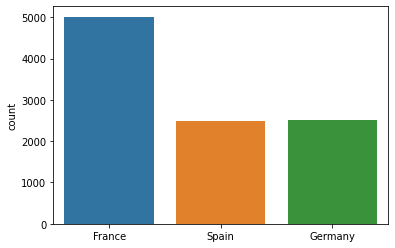

In [3]:
sns.countplot(df.Geography.values)

Most of the bank customers are located in France.

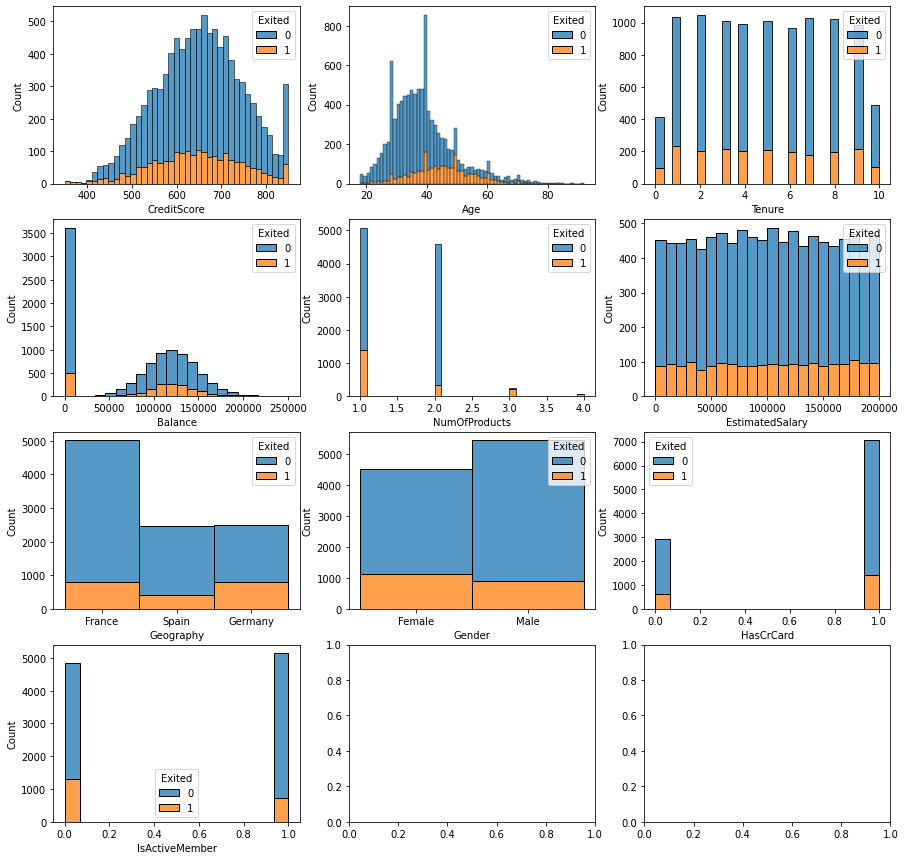

In [4]:
fig, axes = plt.subplots(4, 3, figsize=(15,15))
sns.histplot(ax=axes[0, 0], data=df, x="CreditScore", hue="Exited", multiple="stack")
sns.histplot(ax=axes[0, 1], data=df, x='Age', hue="Exited", multiple="stack")
sns.histplot(ax=axes[0, 2], data=df, x='Tenure', hue="Exited", multiple="stack")
sns.histplot(ax=axes[1, 0], data=df, x='Balance', hue="Exited", multiple="stack")
sns.histplot(ax=axes[1, 1], data=df, x='NumOfProducts', hue="Exited", multiple="stack")
sns.histplot(ax=axes[1, 2], data=df, x='EstimatedSalary', hue="Exited", multiple="stack")
sns.histplot(ax=axes[2, 0], data=df, x='Geography', hue="Exited", multiple="stack")
sns.histplot(ax=axes[2, 1], data=df, x='Gender', hue="Exited", multiple="stack")
sns.histplot(ax=axes[2, 2], data=df, x='HasCrCard', hue="Exited", multiple="stack")
sns.histplot(ax=axes[3, 0], data=df, x='IsActiveMember', hue="Exited", multiple="stack")

As observed, customers from the following groups are more likely to exit:

*   Over the age of 40.
*   From Germany.
*   Female.

Customers from the following groups are less likely to exit:

*   Having 2 products.
*   Active members.

Creating a pair plot to visualize correlation between features

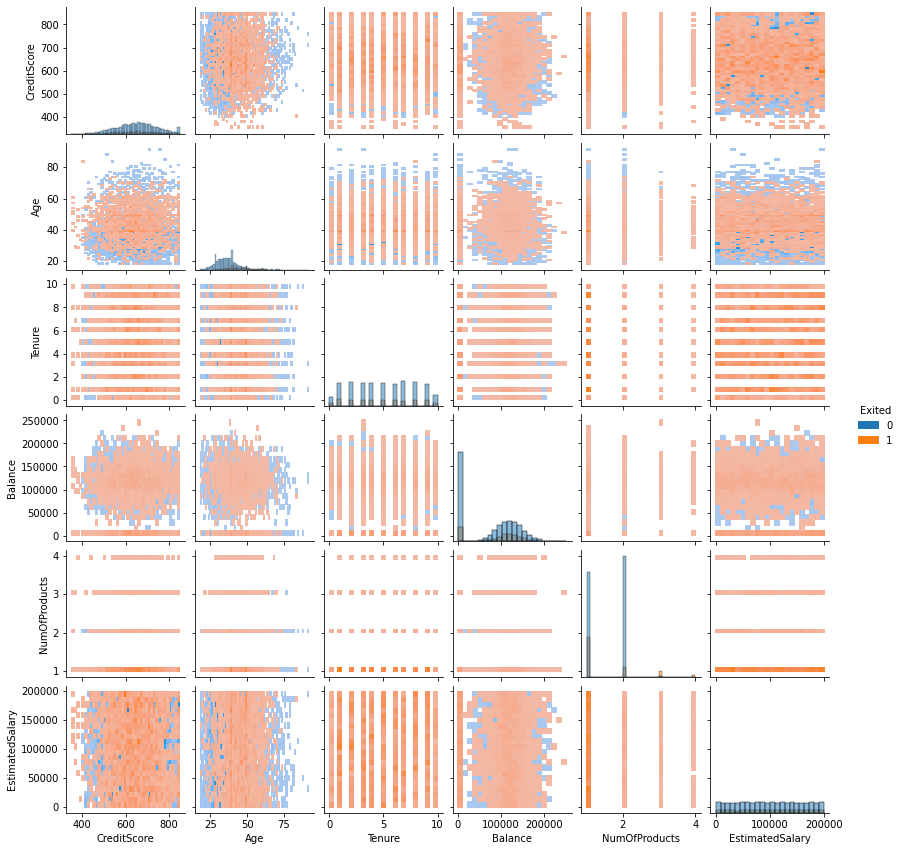

In [5]:
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
sns.pairplot(df[cols], hue='Exited', kind='hist', height=2)
plt.show()

#***Analysis & EDA***

Check for missing values

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We can observe, all the rows has 10000 Non-Null entries. Hence there are no missing/NaN values in above dataset. We will check junk values in Geography and Gender column as they are of type object.

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking unique value for both Geography and Gender to understand if they have any junk values

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Both of the columns do not have junk values.

Dropping column RowNumber, CustomerId, Surname as they have huge unique values and are less relevant to our analysis.

In [11]:
df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Column Gender and Geography has categorical value. Splitting the dataset according to their datatype for convertion.

In [13]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64", 'int64'])

In [14]:
df_cat.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


Label Encoding our categorical columns into numerical value for analysis

In [15]:
for col in df_cat:
  le =LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])
print(df_cat.head())

   Geography  Gender
0          0       0
1          2       0
2          0       0
3          0       0
4          2       0


In [16]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


Analysing skewness of numerical dataset. 

CreditScore = -0.07159586676212397


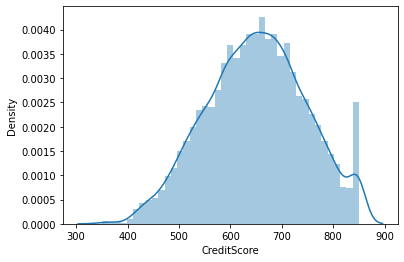

********************************
Age = 1.0111685586628079


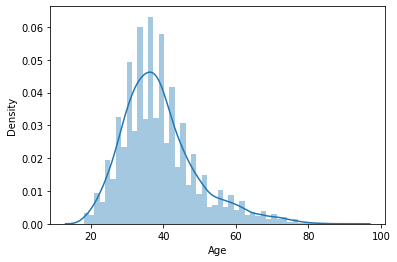

********************************
Tenure = 0.010989809189781041


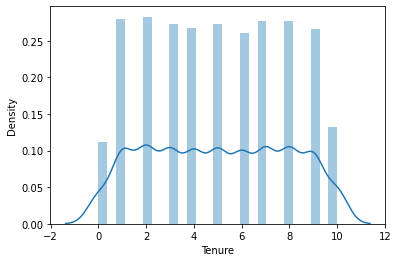

********************************
Balance = -0.14108754375291138


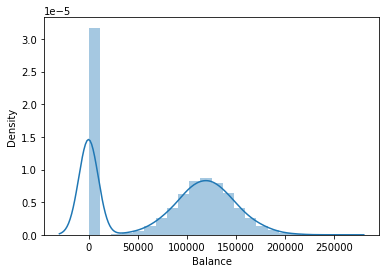

********************************
NumOfProducts = 0.745456048438949


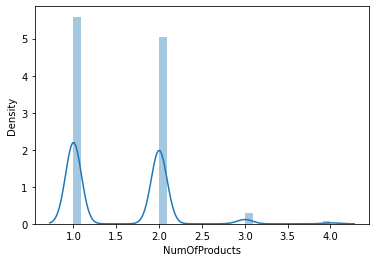

********************************
HasCrCard = -0.9016763178640548


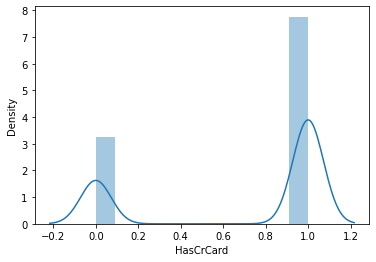

********************************
IsActiveMember = -0.06042756246298516


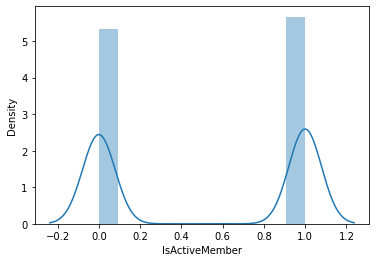

********************************
EstimatedSalary = 0.0020850448448748848


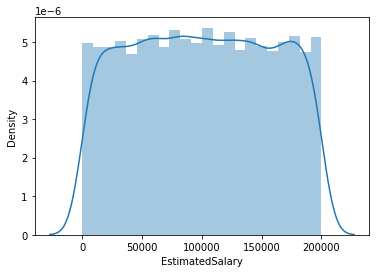

********************************
Exited = 1.4713899141398699


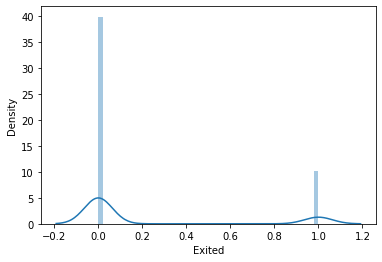

********************************


In [17]:
for col in df_num:
  try:
    print(col, "=", skew(df_num[col]))
    sns.distplot(df_num[col])
    plt.show()
  except:
    pass
  finally:
    print("********************************")
  
#skew value is < -0.5 or >0.5
# High Skewness - Age, NUmof Products
# slight skewness - Hascrcard


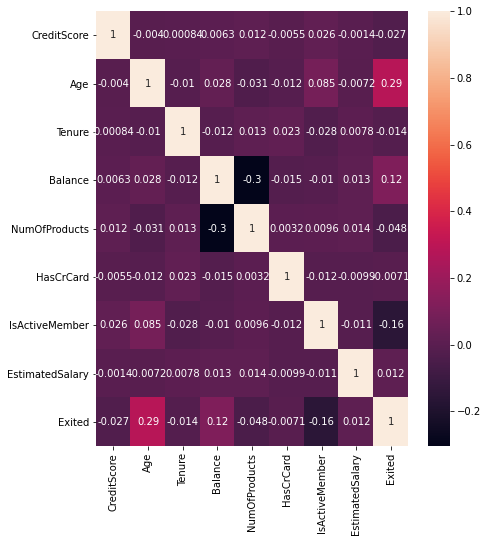

In [18]:
plt.figure(figsize=(7,8))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

Skewness out of range are as follows:


*   Age = 1.01  - ***High***
*   NumofProducts = 0.74 -  ***High***

Both columns do not share high correlation with target feature, handling their skewness below.

Checking for minimum and maximum value as no skewness has to be performed if the column has negative values(handling skewness for negative values leads to NaN)

In [19]:
print("Min: ",min(df['Age']))
print("Max: ",max(df['Age']))

Min:  18
Max:  92


In [20]:
skewed_data = np.sqrt(df_num['Age'])
skew(skewed_data)

0.5933159623197802

In [21]:
df_num['Age'] = np.sqrt(df_num['Age'])

In [22]:
print("Min: ",min(df['NumOfProducts']))
print("Max: ",max(df['NumOfProducts']))

Min:  1
Max:  4


In [23]:
skewed_data = np.sqrt(df_num['NumOfProducts'])
skew(skewed_data)

0.4204651463627845

In [24]:
df_num['NumOfProducts'] = np.sqrt(df_num['NumOfProducts'])

In [25]:
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,6.480741,2,0.00,1.000000,1,1,101348.88,1
1,608,6.403124,1,83807.86,1.000000,0,1,112542.58,0
2,502,6.480741,8,159660.80,1.732051,1,0,113931.57,1
3,699,6.244998,1,0.00,1.414214,0,0,93826.63,0
4,850,6.557439,2,125510.82,1.000000,1,1,79084.10,0


Skewness has been reduced for both columns.

Scaling Dataset

Excluding column Exited as it is the target column and HasCrCard is a categorical column by nature

In [26]:
for col in df_num.drop(['Exited','HasCrCard'],axis=1):
  ss = StandardScaler()
  df_num[col] = ss.fit_transform(df_num[[col]])
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0.363279,-1.041760,-1.225848,-0.940717,1,0.970243,0.021886,1
1,-0.440036,0.267739,-1.387538,0.117350,-0.940717,0,0.970243,0.216534,0
2,-1.536794,0.363279,1.032908,1.333053,2.253455,1,-1.030670,0.240687,1
3,0.501521,0.073098,-1.387538,-1.225848,0.866630,0,-1.030670,-0.108918,0
4,2.063884,0.457688,-1.041760,0.785728,-0.940717,1,0.970243,-0.365276,0


Concatenating EDA Processed data set for further modelling

In [27]:
new_df = pd.concat([df_num, df_cat], axis=1)

In [28]:
new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,-0.326221,0.363279,-1.041760,-1.225848,-0.940717,1,0.970243,0.021886,1,0,0
1,-0.440036,0.267739,-1.387538,0.117350,-0.940717,0,0.970243,0.216534,0,2,0
2,-1.536794,0.363279,1.032908,1.333053,2.253455,1,-1.030670,0.240687,1,0,0
3,0.501521,0.073098,-1.387538,-1.225848,0.866630,0,-1.030670,-0.108918,0,0,0
4,2.063884,0.457688,-1.041760,0.785728,-0.940717,1,0.970243,-0.365276,0,2,0


#***Modeling the dataset***

As modelling the dataset and calculating accuracy of the same will be called multiple times through out notebook. Hence, creating a function to call as and when requried to reduce code duplication.

In [29]:
def Neural_Network(X,y,X_train,X_test,y_train,y_test):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])
  
  model.compile(optimizer="adam", loss="binary_crossentropy",metrics = ['accuracy'])
  trained_model = model.fit(X_train, y_train, epochs=50,batch_size=10)

  print("******* PLOT **********")
  plt.plot(trained_model.history["loss"])

  y_pred = model.predict(X_test)
  y_pred = np.where(y_pred >= 0.5,1,0)

  print("******* CLASSIFICATION REPORT **********")
  print(classification_report(y_test,y_pred))

  print("Accuracy Score: ", accuracy_score(y_test, y_pred))

  return y_pred

In [30]:
new_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

As dataset are highly imbalanced modelling dataset with all possiblities to check accuracy of prediction.

Modelling the dataset without balancing. 

In [31]:
X = new_df.drop('Exited',axis='columns')
y = new_df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)

Epoch 1/50
700/700 [==============================] - 1s 1ms/step - loss: 0.6564 - accuracy: 0.5858
Epoch 2/50
700/700 [==============================] - 1s 993us/step - loss: 0.4402 - accuracy: 0.8016
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4397 - accuracy: 0.8042
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4355 - accuracy: 0.8099
Epoch 5/50
700/700 [==============================] - 1s 988us/step - loss: 0.4116 - accuracy: 0.8275
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3883 - accuracy: 0.8350
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3956 - accuracy: 0.8304
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3927 - accuracy: 0.8356
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3752 - accuracy: 0.8456
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3737 - accuracy: 0.

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

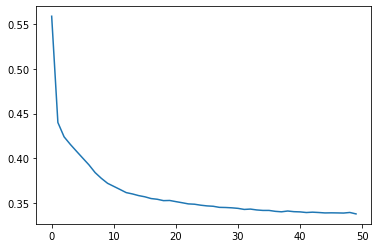

In [32]:
Neural_Network(X,y,X_train,X_test,y_train,y_test)

Modelling the data as is without balancing does give us a good accuracy of 86%. But if we observe classification report, there is a high difference between f1 score for both the classes. Also it has a high recall score.

Progressing with balanced dataset ahead.

Undersampling exited class 0 to number of records of class 1, so that we have balanced number of records for both the classes. 

In [33]:
new_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [34]:
#Creating two variables to store number of record of both the classes for future use
count_class_0, count_class_1 = new_df.Exited.value_counts()

In [35]:
df_class_0 = new_df[new_df['Exited']==0]
df_class_1 = new_df[new_df['Exited']==1]

In [36]:
#Creating a undersample of class 0 w.r.t number of record of class 1
df_class_0_under = df_class_0.sample(count_class_1)

In [37]:
df_class_0_under.shape

(2037, 11)

In [38]:
#Concatenating records of both class 0 and class 1 to create dataset for modelling
df_undersampling = pd.concat([df_class_0_under,df_class_1],axis=0)

In [39]:
df_undersampling['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

We can observe we now have a dataset with 2037 records for both the classes, creating a balanced dataset.

In [40]:
X = df_undersampling.drop('Exited',axis='columns')
y = df_undersampling['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)

Epoch 1/50
286/286 [==============================] - 1s 1ms/step - loss: 0.7492 - accuracy: 0.4686
Epoch 2/50
286/286 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5390
Epoch 3/50
286/286 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6487
Epoch 4/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.6820
Epoch 5/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.6763
Epoch 6/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.6923
Epoch 7/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7037
Epoch 8/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7303
Epoch 9/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.7132
Epoch 10/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.7164

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

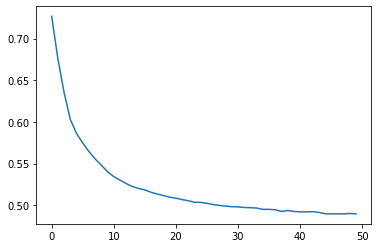

In [41]:
Neural_Network(X,y,X_train,X_test,y_train,y_test)

Oversampling exited class 1 to number of records of class 0, so that we have balanced number of records for both the classes. 

In [42]:
#Creating a oversample of class 1 w.r.t number of record of class 0
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

In [43]:
#Concatenating records of both class 0 and class 1 to create dataset for modelling
df_oversampling = pd.concat([df_class_0,df_class_1_over],axis=0)

In [44]:
df_oversampling['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

We can observe we now have a dataset with 7963 records for both the classes, creating a balanced dataset.

In [45]:
X = df_oversampling.drop('Exited',axis='columns')
y = df_oversampling['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)

Epoch 1/50
1115/1115 [==============================] - 2s 1ms/step - loss: 0.7329 - accuracy: 0.4860
Epoch 2/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.6157 - accuracy: 0.6908
Epoch 3/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7394
Epoch 4/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5035 - accuracy: 0.7448
Epoch 5/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4943 - accuracy: 0.7562
Epoch 6/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4945 - accuracy: 0.7486
Epoch 7/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4932 - accuracy: 0.7582
Epoch 8/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4840 - accuracy: 0.7601
Epoch 9/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4856 - accuracy: 0.7629
Epoch 10/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.477

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

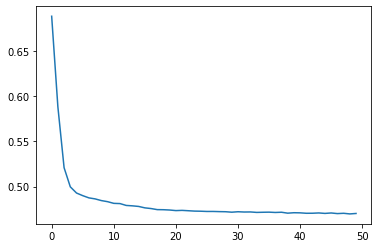

In [46]:
Neural_Network(X,y,X_train,X_test,y_train,y_test)

SMOTE Technique

Using SMOTE technique to balance the dataset for class with minor number of records, so that we have equal number of records for both the classes. This technique creates releavant data for class with minor number of records for balancing.

In [47]:
X = new_df.drop('Exited',axis='columns')
y = new_df['Exited']

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_sample(X,y)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=15,stratify=y_sm)

Epoch 1/50
1115/1115 [==============================] - 2s 1ms/step - loss: 0.6818 - accuracy: 0.5949
Epoch 2/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7384
Epoch 3/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.5044 - accuracy: 0.7478
Epoch 4/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4883 - accuracy: 0.7603
Epoch 5/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4858 - accuracy: 0.7584
Epoch 6/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4657 - accuracy: 0.7748
Epoch 7/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4766 - accuracy: 0.7689
Epoch 8/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4687 - accuracy: 0.7704
Epoch 9/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4586 - accuracy: 0.7775
Epoch 10/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.464

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

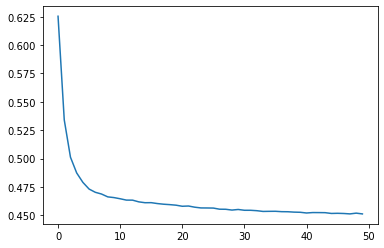

In [50]:
Neural_Network(X_sm,y_sm,X_train,X_test,y_train,y_test)

Use of Ensemble with undersampling

As the column Exited class 0 has 4 times greater number of records as compared to class 1, diving the class 0 into equal number of 4 batches and concatenating the sub-batch with class 1 to create a balanced dataset.

In [51]:
X = new_df.drop('Exited',axis='columns')
y = new_df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)

In [52]:
temp_df = X_train.copy()
temp_df['Exited'] = y_train

df3_class_0 = temp_df[temp_df['Exited']==0]
df3_class_1 = temp_df[temp_df['Exited']==1]

In [53]:
print(df3_class_0.shape," , ", df3_class_1.shape) #1394

(5574, 11)  ,  (1426, 11)


Function to create batches of dataset

In [54]:
def get_train_batch(df_majority,df_minority,start,end):
  df_train = pd.concat([df_majority[start:end],df_minority],axis=0)

  X_train = df_train.drop('Exited',axis='columns')
  y_train = df_train.Exited

  return X_train,y_train

Batch 1 of Ensemble Technique

In [55]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,0,1394)

Epoch 1/50
282/282 [==============================] - 1s 1ms/step - loss: 0.7414 - accuracy: 0.5143
Epoch 2/50
282/282 [==============================] - 0s 991us/step - loss: 0.6523 - accuracy: 0.6193
Epoch 3/50
282/282 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6589
Epoch 4/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7006
Epoch 5/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7218
Epoch 6/50
282/282 [==============================] - 0s 986us/step - loss: 0.5472 - accuracy: 0.7383
Epoch 7/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.7549
Epoch 8/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.7383
Epoch 9/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7405
Epoch 10/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.

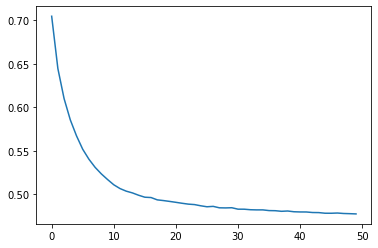

In [56]:
y_pred1 = Neural_Network(X,y,X_train,X_test,y_train,y_test)

Batch 2 of Ensemble Technique

In [57]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,1394,2788)

Epoch 1/50
282/282 [==============================] - 1s 1ms/step - loss: 0.7059 - accuracy: 0.4510
Epoch 2/50
282/282 [==============================] - 0s 943us/step - loss: 0.6831 - accuracy: 0.5401
Epoch 3/50
282/282 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.6699
Epoch 4/50
282/282 [==============================] - 0s 984us/step - loss: 0.5820 - accuracy: 0.7083
Epoch 5/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7142
Epoch 6/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.7133
Epoch 7/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.7184
Epoch 8/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.7280
Epoch 9/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.7439
Epoch 10/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.

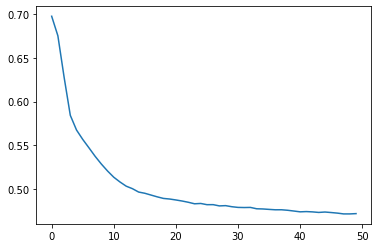

In [58]:
y_pred2 = Neural_Network(X,y,X_train,X_test,y_train,y_test)

Batch 3 of Ensemble Technique

In [59]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,2788,4182)

Epoch 1/50
282/282 [==============================] - 1s 1ms/step - loss: 0.7292 - accuracy: 0.5000
Epoch 2/50
282/282 [==============================] - 0s 941us/step - loss: 0.6772 - accuracy: 0.5749
Epoch 3/50
282/282 [==============================] - 0s 991us/step - loss: 0.6448 - accuracy: 0.6322
Epoch 4/50
282/282 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.6886
Epoch 5/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.7094
Epoch 6/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.7072
Epoch 7/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.7210
Epoch 8/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5604 - accuracy: 0.7307
Epoch 9/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7391
Epoch 10/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.

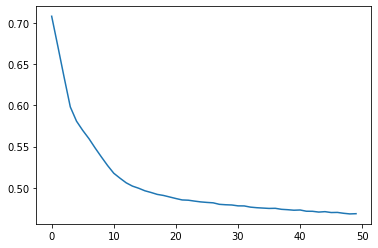

In [60]:
y_pred3 = Neural_Network(X,y,X_train,X_test,y_train,y_test)

Batch 4 of Ensemble Technique

Epoch 1/50
282/282 [==============================] - 1s 1ms/step - loss: 0.6958 - accuracy: 0.5132
Epoch 2/50
282/282 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.5986
Epoch 3/50
282/282 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.6759
Epoch 4/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6820
Epoch 5/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.7023
Epoch 6/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.7160
Epoch 7/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7351
Epoch 8/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7425
Epoch 9/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7397
Epoch 10/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.7321

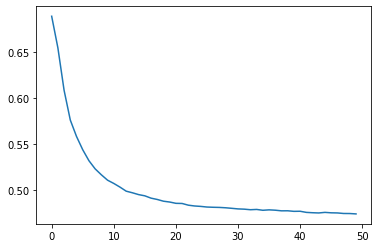

In [61]:
X_train, y_train = get_train_batch(df3_class_0,df3_class_1,4182,5575)
y_pred4 = Neural_Network(X,y,X_train,X_test,y_train,y_test)

Taking average of all four batches to record output of majority of all the 4 balanced modelling performed.

In [62]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]+y_pred4[i]

  if n_ones>2:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0

In [63]:
print(classification_report(y_test,y_pred_final))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2389
           1       0.47      0.72      0.57       611

    accuracy                           0.78      3000
   macro avg       0.69      0.76      0.71      3000
weighted avg       0.83      0.78      0.79      3000

Accuracy Score:  0.775


#Observation

Analysing prediction all four balancing methods.
1. Modeling using unbalanced dataset - This method does give us a good accuracy but there are high false positives and false negatives. Also the difference between F1 scores is quite huge.
2. Modeling using undersampled/oversampled dataset -  It gives us a little better outcome considering both accuracy as well as F1 scores.
3. Modeling using SMOTE dataset - This method does give us a good accuracy also the false positives and false negatives are quite low compared to above technique.
4. Modeling using ensembling with undersampling dataset - This method does give us a good accuracy also the false positives and false negatives are considerably low compared to all other technique. But the difference between F1 score of both the classes also cannot be ignored.

#***Conclusion***

#### Observing the accuracy of all the modelling SMOTE Technique for balancing helps us provide a better prediction with maximum accuracy of 80%, with a balanced F1 score of 80% for both the classes.

####We chose a Deep Learning Neural Network with 2 hidden layers with 6 nodes each with relu as activation function and one output layer with sigmoid as activation function.